In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import tkinter as tk
from tkinter import filedialog

In [2]:
def findFile(request):  #Ask for File
    print('Please select the ' + request + ' file: ')
    root = tk.Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    filepath = filedialog.askopenfilename()
    root.destroy()
    return filepath

In [3]:
irisDf = pd.read_excel(findFile('Proj1DataSet.xlsx'))
data = irisDf.values
irisDf.head()

Please select the Proj1DataSet.xlsx file: 


,sepL,sepW,petL,petW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
labels = irisDf['species'].unique()
features = list(irisDf.columns.values)

markers = ['square', 'circle', 'triangle_up']    
colors = []

for index, row in irisDf.iterrows():
    if row['species'] == 'setosa':
        colors.append('crimson')
    elif row['species'] == 'versicolor':
        colors.append('royalblue')
    else:
        colors.append('darkorange')

In [5]:
irisDf['sepL'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

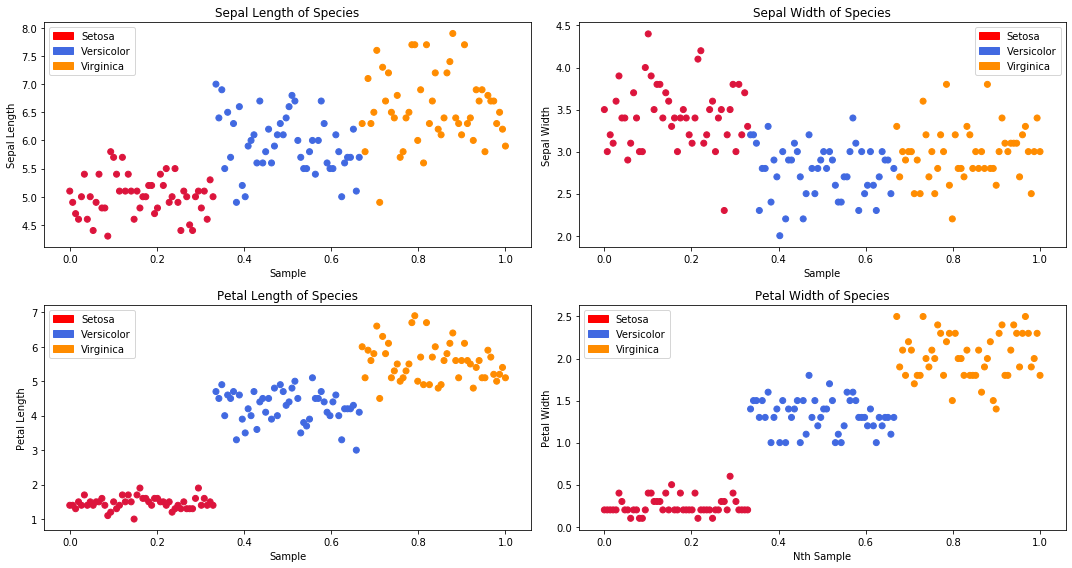

In [17]:
plt.subplots(2,2,figsize=(15,8))
red = mpatches.Patch(color='red', label='Setosa')
blue = mpatches.Patch(color='royalblue', label='Versicolor')
orange = mpatches.Patch(color='darkorange', label='Virginica')


plt.subplot(2,2,1)
plt.scatter(np.linspace(0,1,len(irisDf['sepL'].values)),irisDf['sepL'].values,marker='o',c=colors)
plt.title('Sepal Length of Species')
plt.xlabel('Sample')
plt.ylabel('Sepal Length')
plt.legend(handles=[red,blue,orange])

plt.subplot(2,2,2)
plt.scatter(np.linspace(0,1,len(irisDf['sepW'].values)),irisDf['sepW'].values,marker='o',c=colors)
plt.title('Sepal Width of Species')
plt.xlabel('Sample')
plt.ylabel('Sepal Width')
plt.legend(handles=[red,blue,orange])

plt.subplot(2,2,3)
plt.scatter(np.linspace(0,1,len(irisDf['petL'].values)),irisDf['petL'].values,marker='o',c=colors)
plt.title('Petal Length of Species')
plt.xlabel('Sample')
plt.ylabel('Petal Length')
plt.legend(handles=[red,blue,orange])

plt.subplot(2,2,4)
plt.scatter(np.linspace(0,1,len(irisDf['petW'].values)),irisDf['petW'].values,marker='o',c=colors)
plt.title('Petal Width of Species')
plt.xlabel('Nth Sample')
plt.ylabel('Petal Width')
plt.legend(handles=[red,blue,orange])


plt.tight_layout()
plt.show()

In [ ]:
#1. The features in this dataset are distinct enough to solve the problem, 
#   but I expect the petal length and width features to be the better features 
#   for classifying the three flower species.

In [19]:
#Compute stats of features

mins = []
maxs = []
means = []
var = []
intraVar = []
interVar = []

setosa = irisDf.loc[irisDf['species'] == 'setosa']
versicolor = irisDf.loc[irisDf['species'] == 'versicolor']
virginica = irisDf.loc[irisDf['species'] == 'virginica']

priorSetosa = len(setosa)/len(irisDf)
priorVersicolor = len(versicolor)/len(irisDf)
priorVirginica = len(virginica)/len(irisDf)


for i in range(0,len(features) - 1):
    
    mins.append(np.min(irisDf[features[i]]))
    maxs.append(np.max(irisDf[features[i]]))
    means.append(np.mean(irisDf[features[i]]))
    var.append(np.var(irisDf[features[i]]))
    
    intraVar.append( (priorSetosa*(np.var(setosa[features[i]]))) \
                    + (priorVersicolor*(np.var(versicolor[features[i]]))) \
                    + (priorVirginica*(np.var(virginica[features[i]]))) )
    
    interVar.append( (priorSetosa*(np.mean(setosa[features[i]]) - means[i])**2) \
                   + (priorVersicolor*(np.mean(versicolor[features[i]]) - means[i])**2) \
                   + (priorVirginica*(np.mean(virginica[features[i]]) - means[i])**2))

In [20]:
statDf = pd.DataFrame([mins,maxs,means,var,intraVar,interVar], \
                      columns = ['SepL', 'SepW', 'PetL', 'PetW'],index=['Min', 'Max', 'Mean' , 'Var' , 'IntraClassVar' , 'InterClassVar'])

In [21]:
print(statDf)

                   SepL      SepW      PetL      PetW
Min            4.300000  2.000000  1.000000  0.100000
Max            7.900000  4.400000  6.900000  2.500000
Mean           5.843333  3.057333  3.758000  1.199333
Var            0.681122  0.188713  3.095503  0.577133
IntraClassVar  0.259708  0.113080  0.181484  0.041044
InterClassVar  0.421414  0.075633  2.914019  0.536089
